___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline
(You'll import sklearn as you need it.)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [ ]:
data = files.upload()

Saving Ecommerce Customers to Ecommerce Customers


In [ ]:
df = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info

<bound method DataFrame.info of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ... 

In [ ]:
df.count

<bound method DataFrame.count of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

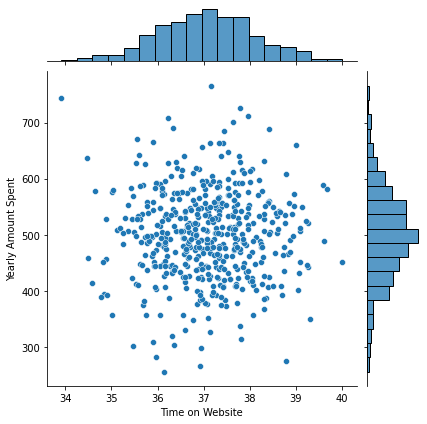

In [ ]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

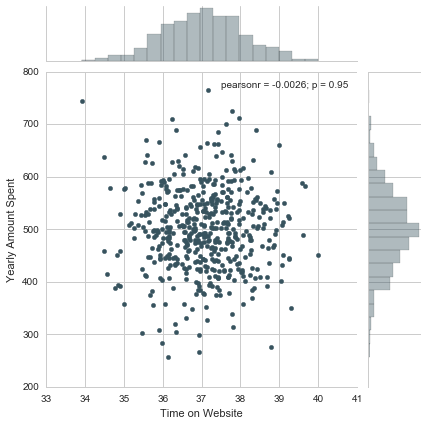

In [ ]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

** Do the same but with the Time on App column instead. **

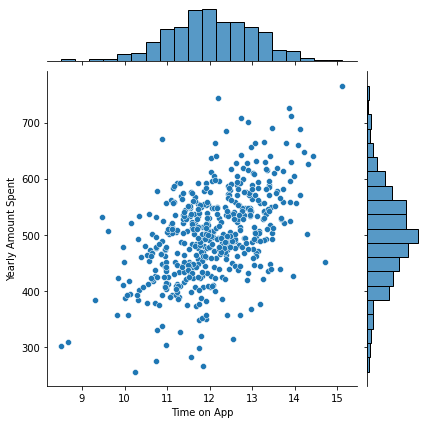

In [ ]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent')

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

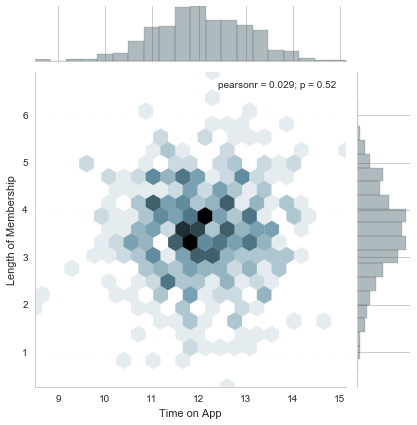

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

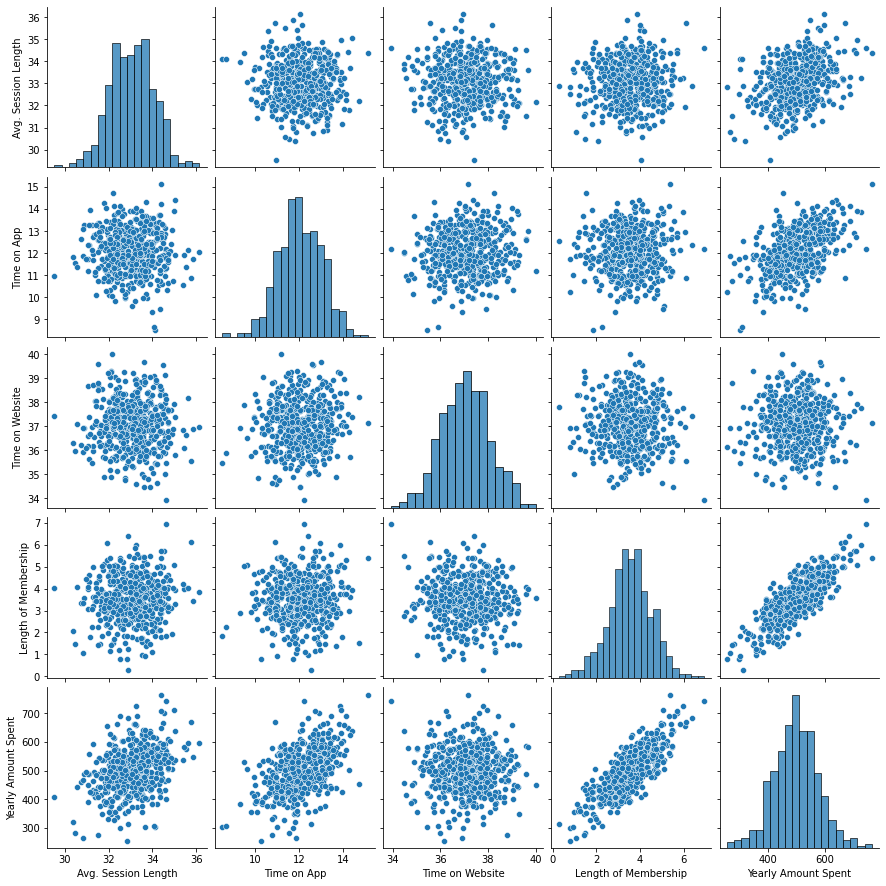

In [ ]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
#length of membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

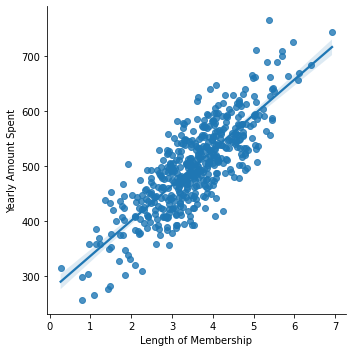

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data = df)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
y=df['Yearly Amount Spent']
X=df[[ 'Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [ ]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [ ]:
lm=LinearRegression()

** Train/fit lm on the training data.**

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [ ]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [ ]:
predictions=lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'predicted values')

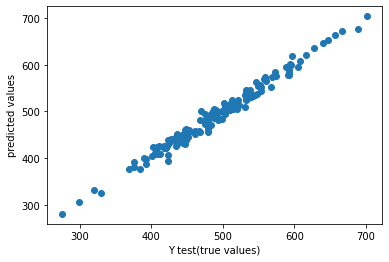

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test(true values)')
plt.ylabel("predicted values")

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [ ]:
from sklearn import metrics


In [ ]:
print('Mae' ,metrics.mean_absolute_error(y_test,predictions))
print('Mse' ,metrics.mean_squared_error(y_test,predictions))
print('rMae' ,np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mae 8.426091641432116
Mse 103.91554136503333
rMae 10.193897260863155


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.9812611651910702

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

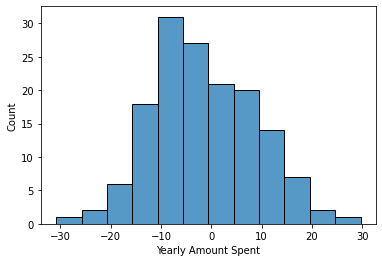

In [ ]:
sns.histplot(y_test-predictions)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [ ]:
dcf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
dcf

,Coeff
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


** How can you interpret these coefficients? **

*Answer here*

**Do you think the company should focus more on their mobile app or on their website?**

*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.

_________________________________________________________________________

# project 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

In [ ]:
data=files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
df = pd.read_csv('USA_Housing.csv')

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.info

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

In [ ]:
df.describe

<bound method NDFrame.describe of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0       

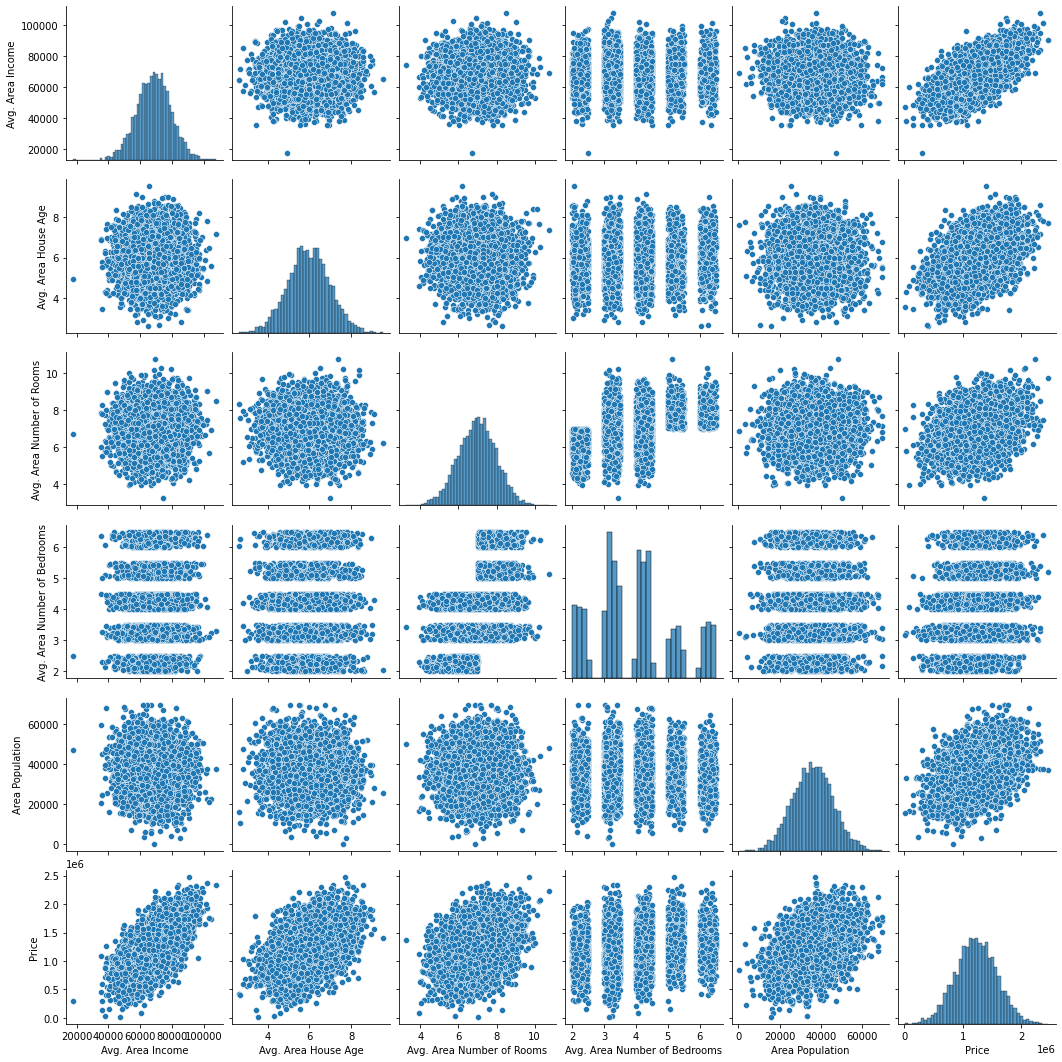

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

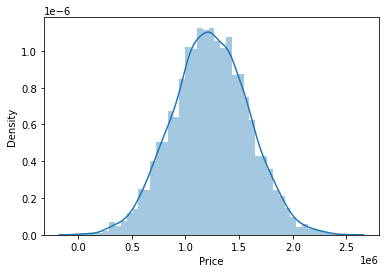

In [ ]:
sns.distplot(df['Price'])

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

-2640159.7968526953


In [ ]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [ ]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [ ]:
cdf= pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [ ]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [ ]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


**predictions**

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

In [ ]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

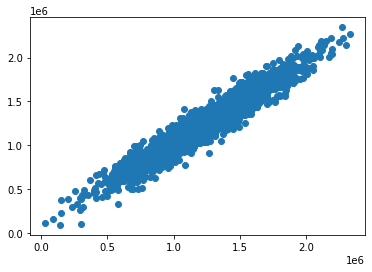

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

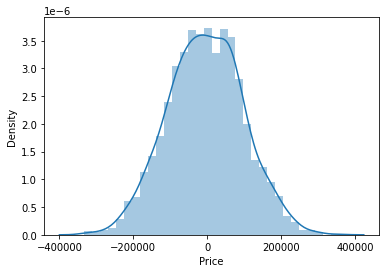

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914942

In [ ]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208977

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290897